## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pharmaceutical_df = pd.merge(mouse_metadata, study_results,how='outer', on='Mouse ID' )
# Display the data table for preview
pharmaceutical_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
number_mice = len(list(pharmaceutical_df['Mouse ID'].unique()))
number_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_df = pharmaceutical_df[pharmaceutical_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# This DataFrame is store all duplicated data from g989
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pharmaceutical_clean_df = pharmaceutical_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
pharmaceutical_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

double_check_df = pharmaceutical_clean_df.loc[pharmaceutical_clean_df['Mouse ID'] == 'g989']
double_check_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
print(f"Number mice after dropping duplicated datas are {len(list(pharmaceutical_df['Mouse ID'].unique()))} mice")

Number mice after dropping duplicated datas are 249 mice


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_df = pharmaceutical_clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen = regimen_df.mean()
median_regimen = regimen_df.median()
var_regimen = regimen_df.var()
std_regimen = regimen_df.std()
sem_regimen = regimen_df.sem()
# Assemble the resulting series into a single summary dataframe.
summary_statistics = pd.DataFrame({'Mean': mean_regimen,
                                   'Median': median_regimen,
                                   'Variance': var_regimen,
                                   'Standard Deviation': std_regimen,
                                   'SEM': sem_regimen

})
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary_statistics = regimen_df.agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

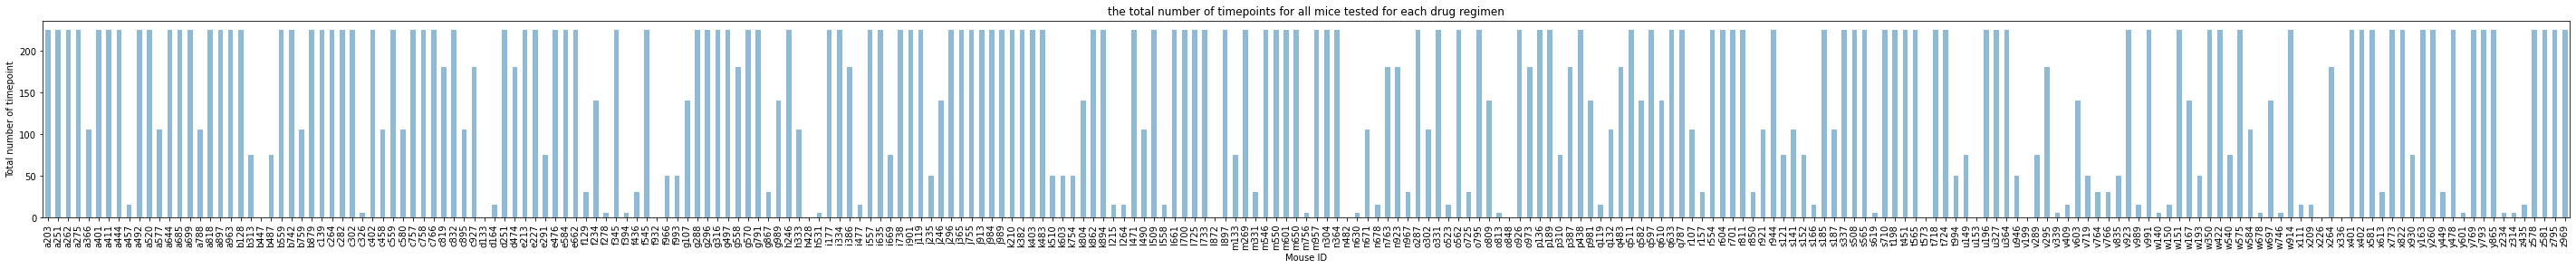

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
grouped_df = pharmaceutical_clean_df.groupby('Mouse ID')
total_timepoint_df = grouped_df['Timepoint'].sum()
bar_plot_pandas = total_timepoint_df.plot(kind = 'bar', figsize =(50,4), title = 'the total number of timepoints for all mice tested for each drug regimen', xlabel = 'Mouse ID', ylabel = 'Total number of timepoint' , alpha=0.5)


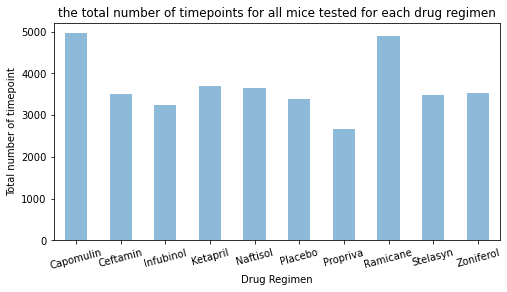

In [11]:
grouped_df2 = pharmaceutical_clean_df.groupby('Drug Regimen')
total_timepoint_df2 = grouped_df2['Timepoint'].sum()

bar_plot_pandas2 = total_timepoint_df2.plot(kind = 'bar', figsize =(8,4), title = 'the total number of timepoints for all mice tested for each drug regimen', xlabel = 'Drug Regimen', ylabel = 'Total number of timepoint' , rot =15, alpha=0.5)

([<matplotlib.axis.XTick at 0x1dd963b4610>,
 [Text(0, 0, 'k403'),
  Text(1, 0, 's185'),
  Text(2, 0, 'x401'),
  Text(3, 0, 'm601'),
  Text(4, 0, 'g791'),
  Text(5, 0, 's508'),
  Text(6, 0, 'f966'),
  Text(7, 0, 'm546'),
  Text(8, 0, 'z578'),
  Text(9, 0, 'j913'),
  Text(10, 0, 'u364'),
  Text(11, 0, 'n364'),
  Text(12, 0, 'y793'),
  Text(13, 0, 'r554'),
  Text(14, 0, 'm957'),
  Text(15, 0, 'c758'),
  Text(16, 0, 't565'),
  Text(17, 0, 'a644'),
  Text(18, 0, 'i177'),
  Text(19, 0, 'j989'),
  Text(20, 0, 'i738'),
  Text(21, 0, 'a520'),
  Text(22, 0, 'w914'),
  Text(23, 0, 'r811'),
  Text(24, 0, 'g288'),
  Text(25, 0, 'i334'),
  Text(26, 0, 'q610'),
  Text(27, 0, 'd251'),
  Text(28, 0, 'l897'),
  Text(29, 0, 'c458'),
  Text(30, 0, 'b742'),
  Text(31, 0, 'b128'),
  Text(32, 0, 'j246'),
  Text(33, 0, 'a411'),
  Text(34, 0, 'j119'),
  Text(35, 0, 'w150'),
  Text(36, 0, 'v923'),
  Text(37, 0, 'g316'),
  Text(38, 0, 's710'),
  Text(39, 0, 'l509'),
  Text(40, 0, 'r944'),
  Text(41, 0, 'e662'),


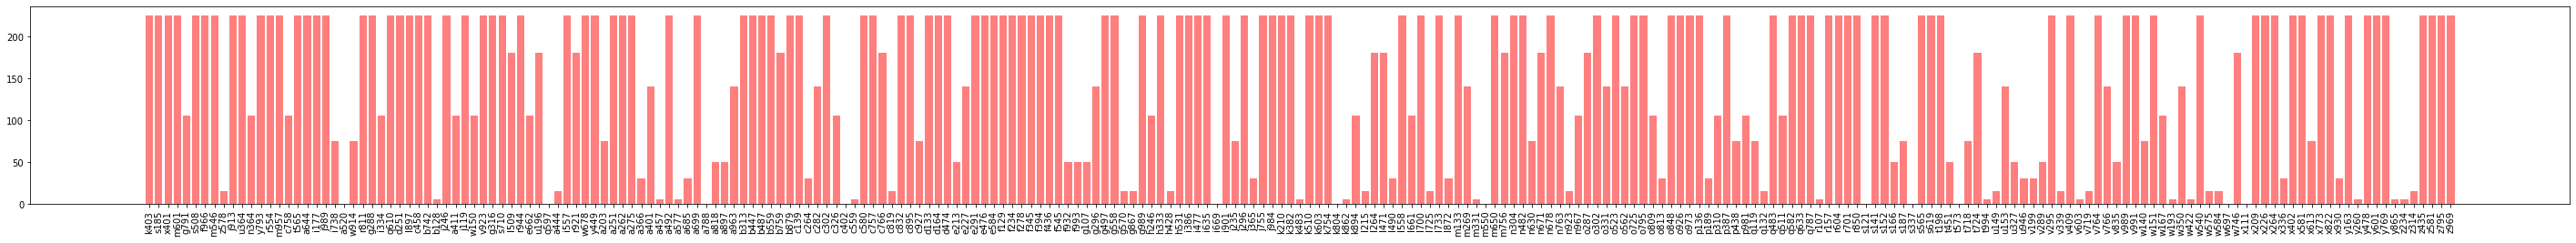

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = np.arange(len(list(pharmaceutical_df['Mouse ID'].unique())))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(50, 4))
plt.bar(x_axis, grouped_df['Timepoint'].sum(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, list(pharmaceutical_df['Mouse ID'].unique()), rotation="vertical")


Text(0, 0.5, 'Total number of timepoint')

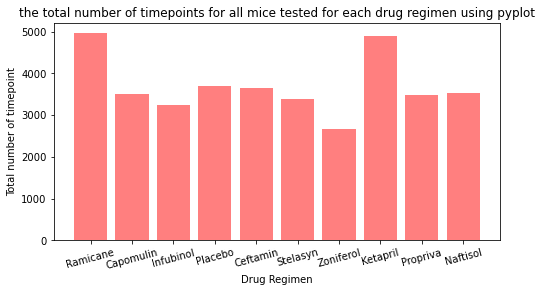

In [13]:
x_axis2 = np.arange(len(list(pharmaceutical_df['Drug Regimen'].unique())))
tick_locations2 = [value for value in x_axis2]

plt.figure(figsize=(8, 4))
plt.bar(x_axis2, grouped_df2['Timepoint'].sum(), color='r', alpha=0.5, align="center")
plt.xticks(tick_locations2, list(pharmaceutical_df['Drug Regimen'].unique()), rotation=15)
plt.title("the total number of timepoints for all mice tested for each drug regimen using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoint")

<AxesSubplot:title={'center':'the distribution of female versus male mice using pandas'}, ylabel='Sex'>

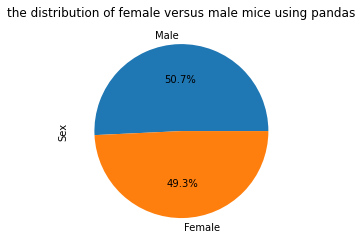

In [14]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
pharmaceutical_clean_df['Sex'].value_counts().plot(kind = 'pie', title ='the distribution of female versus male mice using pandas', autopct="%1.1f%%" )

In [15]:
df = pharmaceutical_clean_df.groupby('Sex')
df['Mouse ID'].count()

Sex
Female    930
Male      958
Name: Mouse ID, dtype: int64

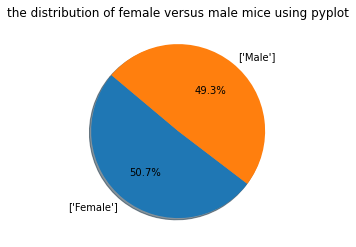

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pharmaceutical_clean_df['Sex'].value_counts(),labels =df['Sex'].unique() ,autopct="%1.1f%%",shadow=True, startangle=140 )
plt.title("the distribution of female versus male mice using pyplot")
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pharmaceutical_clean_df.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = pd.merge(max_timepoint, pharmaceutical_clean_df , how="left", on=["Mouse ID", "Timepoint"])
max_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
max_tumor_list = list(max_timepoint_df['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    max_tumor_volume_df = max_timepoint_df.loc[(max_timepoint_df['Drug Regimen'] == i), :]['Tumor Volume (mm3)']
    
    # add subset 
    q1 = max_tumor_volume_df.quantile(0.25)
    q3 = max_tumor_volume_df.quantile(0.75)
    
    iqr = q3 - q1
    
    lowerb = q1 - 1.5 * iqr
    upperb = q3 + 1.5 * iqr   
    
    # Determine outliers using upper and lower bounds
    outlier = max_tumor_volume_df[((max_tumor_volume_df < lowerb) | (max_tumor_volume_df > upperb))]
    print(f"{i}'s potential outliers: {outlier}")
finalize_data = max_timepoint_df.loc[(max_timepoint_df['Drug Regimen'].isin(treatment_list)), :]
finalize_data

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


Text(0, 0.5, 'Tumor Volume (mm3)')

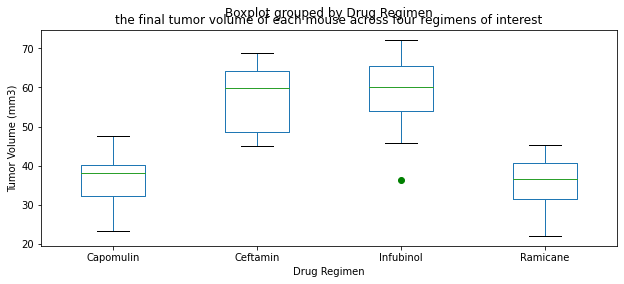

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

finalize_data.boxplot(by = "Drug Regimen", column = "Tumor Volume (mm3)", grid = False, sym = "green", figsize=(10,4))
plt.title("the final tumor volume of each mouse across four regimens of interest")
plt.ylabel("Tumor Volume (mm3)")

## Line and Scatter Plots

<AxesSubplot:title={'center':'tumor volume vs. time point for all mice treated with Capomulin'}, xlabel='Timepoint', ylabel='Tumor Volume (mm3)'>

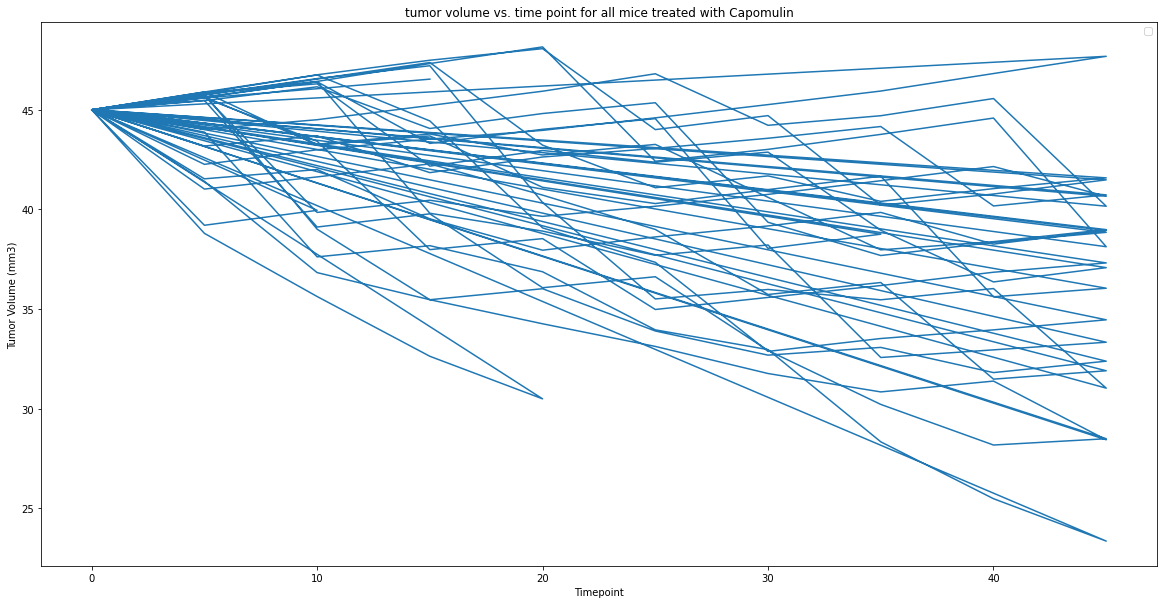

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_drug_df = pharmaceutical_clean_df.loc[(pharmaceutical_clean_df['Drug Regimen'] == 'Capomulin'), :].set_index('Timepoint')

plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(capomulin_drug_df['Mouse ID'])
plt.title("tumor volume vs. time point for all mice treated with Capomulin")
capomulin_drug_df['Tumor Volume (mm3)'].plot.line(figsize =(20,10))

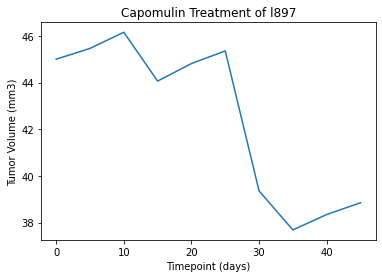

In [33]:
# list of mice treated with capomulin

list_mice_capomulin = list(capomulin_drug_df['Mouse ID'].unique())

# Ask which mouse tou want to observe
question = ("What mouse would you like to search for? "
            f"{list_mice_capomulin}")
kind_of_search = input(question)
chosen_mouse = pharmaceutical_clean_df.loc[(pharmaceutical_clean_df['Drug Regimen'] == 'Capomulin'), :].loc[(pharmaceutical_clean_df.loc[(pharmaceutical_clean_df['Drug Regimen'] == 'Capomulin'), :]["Mouse ID"] == kind_of_search), :]
# 
plt.plot(chosen_mouse['Timepoint'], chosen_mouse['Tumor Volume (mm3)'])
plt.title(f"Capomulin Treatment of {kind_of_search}")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


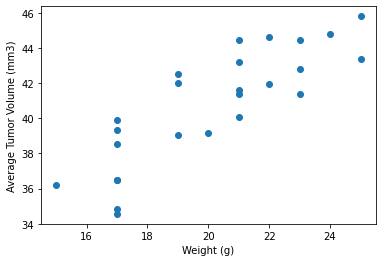

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight = capomulin_drug_df.groupby("Mouse ID")["Weight (g)"].mean()
avg_tumor_vol = capomulin_drug_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


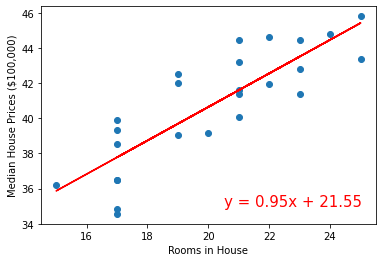

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight,avg_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(20.5,35),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [24]:
print(line_eq)

y = 0.95x + 21.55
